In [1]:
# Imports -  These are all you need for the assignment: do not import additional packages
% reset
% config InlineBackend.figure_format = 'retina'

%matplotlib inline

import geocoder
import folium
from haversine import haversine

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
sns.set(style='whitegrid', context ='paper')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
csv_file = 'incidents-100k.csv'
df =pd.read_csv(csv_file)

In [3]:
# 2012 length --> 143182 for incidents 57
# 2012 length --> 13923 for incidents-100k.csv
df_2012=df.loc[df['year']== 2012]
j=0
points = []
for i in range (100):
    latitude = df['lat'][j]
    longitude = df['lon'][j]
    points.append(tuple([latitude,longitude]))
    j=j+1

In [4]:
csv_file = 'abc_licenses_sdcounty.csv'
df2 = pd.read_csv(csv_file)

In [5]:
points2 = []
j=0
df_alcohol = pd.read_csv('abc_licenses_sdcounty.csv')
df_alcohol = df_alcohol.loc[(df_alcohol["premisesaddress"].str.contains(', SAN DIEGO, CA'))] 

for j, row in df_alcohol.iterrows():
    latitude = row['lat']
    longitude = row['lon']
    points2.append(tuple([latitude,longitude]))
    

Get population of different county's and compare based on crime and similar population

In [6]:
#df.shape
#df['desc'].value_counts() #El cajon and natioonal city
#df['coun_pop']#.value_counts()
#El Cajon                   SndELC      16548     
#National City              SndNAT      16509  
#df['community']
#df['nbrhood']


df_Clairemont = df.loc[df['community']=='SanCLA']
#df_San_Clemente --> 4388 rows × 26 columns

df_Encanto = df.loc[df['community']=='SanENC']
#df_Encinitas --> 3006 rows × 26 columns

df_Clairemont['comm_pop'].value_counts()
#140738    2964
#142456    1422
#147442       2


#### let's say the popu is 100 2
#### Let's say the popu is 500 8 600/3 =/= average...
# 1718 is the difference between the populations
# 1542 is the difference between the popu counts
# 176 is the difference between the differences


#df_Encinitas['coun_pop'].value_counts()
#142911    3004
#0            2

77873    4388
Name: comm_pop, dtype: int64

In [7]:
San_CLA_Popu = df_Clairemont['comm_pop'].value_counts()


zip_dict = {}
zip_length = len(San_CLA_Popu)
i=0
count = 0
total_population = 0
diff_populations = 0
for i in df_Clairemont.index:
    get_CLA_popu=df_Clairemont.ix[i, 'comm_pop'] 
    if get_CLA_popu in zip_dict:
        count = (zip_dict.get(get_CLA_popu))+1
        zip_dict.update({get_CLA_popu:count})
    else:
        count = 0
        zip_dict.update({get_CLA_popu:1})
        
for x,y in zip_dict.items():
    total_population = total_population+x
    if x!=0:
        diff_populations +=1
    

final_population = (total_population // diff_populations)
final_population

77873

In [8]:
#1:140738
#2:142456
#3:147442

#final_population: 143545   "Average"

In [9]:
Clairemont_population = final_population

In [10]:
Encanto_Popu = df_Encanto['comm_pop'].value_counts()


zip_dict2 = {}
zip_length = len(Encanto_Popu)
i=0
count = 0
total_population = 0
diff_populations = 0
for i in df_Encanto.index:
    get_Encanto_popu=df_Encanto.ix[i, 'comm_pop'] 
    if get_Encanto_popu in zip_dict2:
        count = (zip_dict2.get(get_Encanto_popu))+1
        zip_dict2.update({get_Encanto_popu:count})
    else:
        count = 0
        zip_dict2.update({get_Encanto_popu:1})
        
for x,y in zip_dict2.items():
    total_population = total_population+x
    if x!=0:
        diff_populations +=1
    

final_population = (total_population // diff_populations) 

#final_population

47361

In [11]:
df_Encanto['comm_pop'].value_counts()

47361    3006
Name: comm_pop, dtype: int64

In [12]:
#1:142911    3004
#2:0            2
#final_population = 142911

In [13]:
Encanto_population = final_population

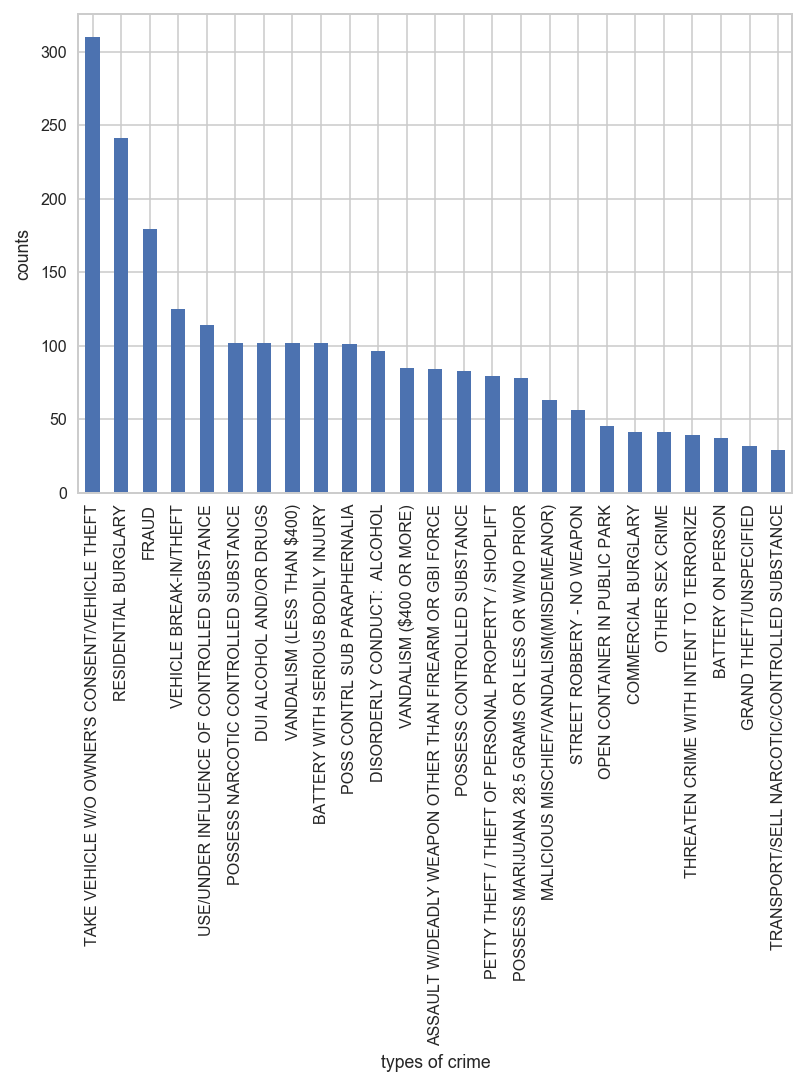

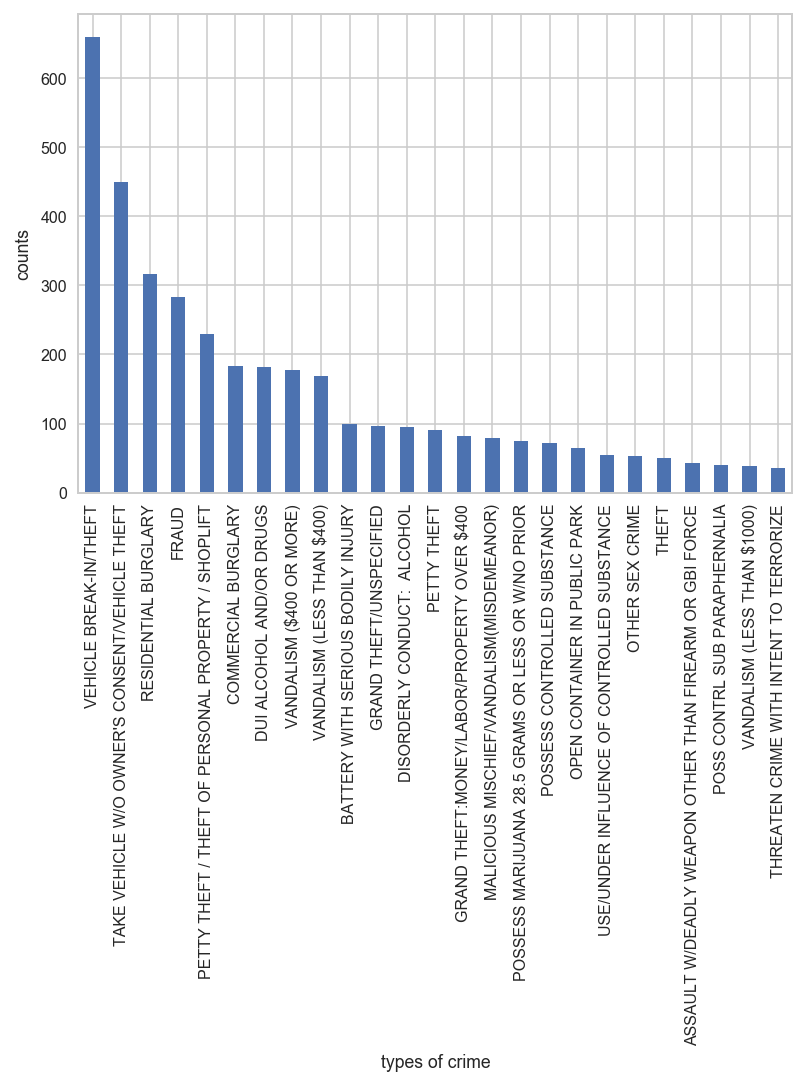

In [14]:
diff_crime_Encanto = df_Encanto['desc'].value_counts()[0:25]
diff_crime_Encanto.plot.bar()
plt.ylabel('counts')
plt.xlabel('types of crime')
plt.show()

diff_crime_Clairemont = df_Clairemont['desc'].value_counts()[0:25]
diff_crime_Clairemont.plot.bar()
plt.ylabel('counts')
plt.xlabel('types of crime')
plt.show()

[47359, 47363, 77865, 77880]

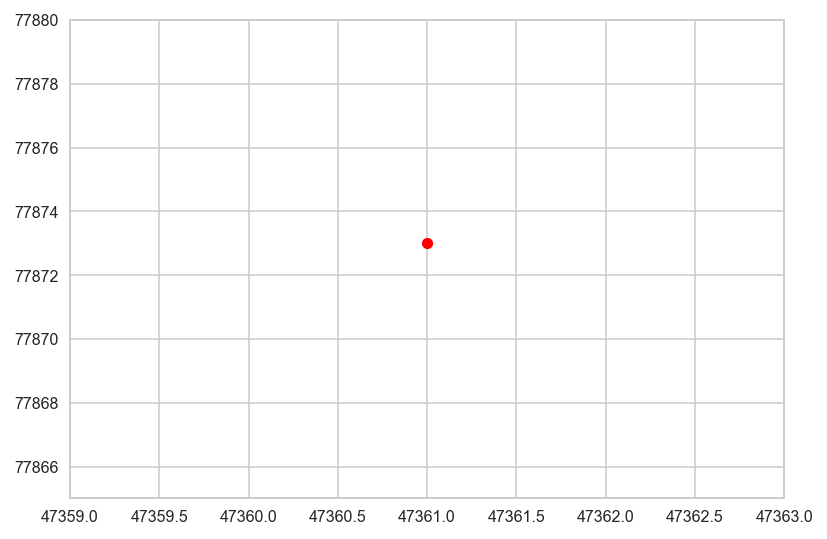

In [15]:
#Encinitas_population
x=Encanto_population
#x=df_Clairemont['coun_pop'].value_counts()[0:1]
#x.plot.bar()
#plt.show()

y=Clairemont_population
#y=df_Encanto['coun_pop'].value_counts()
#y.plot.bar()
#plt.show()
plt.plot(x,y,'ro')
plt.axis([47359, 47363, 77865, 77880])

In [16]:
# read in the dbf (metadata) file and list all the methods associated with it
import shapefile
sf = shapefile.Reader("ZillowNeighborhoods-CA.dbf")

In [17]:
metadata = sf.shapeRecords()
metadata[38].record

['CA', 'San Diego', 'San Diego', 'Ocean Beach', '117021']

In [18]:
# find indices of all San Diego neighborhoods
sd_list = []
counter = 0

for i in range(len(metadata)):
    if metadata[i].record[2] == 'San Diego':
        sd_list.append(i)
        counter += 1


In [19]:
shapes = sf.shapes()

sd_shapes = []

for i in range(len(sd_list)):
    sd_shapes.append(shapes[sd_list[i]].points)

for i in range(len(sd_shapes)):
    for j in range(len(sd_shapes[i])):
        sd_shapes[i][j] = sd_shapes[i][j][::-1]


In [21]:
read_shapemeta=shapefile.Reader('ZillowNeighborhoods-CA.dbf')
shapemeta = read_shapemeta.shapeRecords()


sorted_SD_list = []


# This prints out the communities in san diego
for i in range(len(shapemeta)):
     if metadata[i].record[2] == 'San Diego':
        sorted_SD_list.append(shapemeta[i].record[3])


In [22]:
# Converting Clarinova codes into the full name 
cpc_to_fullname = {'SanBAL':'Balboa Park', 'SanBAR':'Barrio Logan',
                    'SanBLA':'Black Mountain Ranch', 'SanCAR':'Carmel Valley',
                    'SanCLA':'Clairemont Mesa', 'SanCOL':'College Area',
                    'SanCRM':'Carmel Mountain Ranch', 'SanDEL':'Del Mar Mesa',
                    'SanDOW':'Downtown', 'SanENC':'Encanto Neighborhoods, Southeastern',
                    'SanEST':'East Elliott', 'SanFAR':'Fairbanks Ranch Country Club',
                    'SanGRE':'Greater North Park', 'SanGRT':'Greater Golden Hill',
                    'SanKER':'Kearny Mesa', 'SanLAJ':'La Jolla', 'SanLIN':'Linda Vista',
                    'SanLOS':'Los Penasquitos Canyon', 'SanMDC':'Mid-City:City Heights',
                    'SanMDS':'Mid-City:Normal Heights', 'SanMDW':'Midway-Pacific Highway',
                    'SanMID':'Mid-City:Eastern Area', 'SanMII':'Mid-City:Kensington-Talmadge',
                    'SanMIL':'Military Facilities', 'SanMIR':'Mira Mesa',
                    'SanMIS':'Mission Bay Park', 'SanMRM':'Miramar Ranch North',
                    'SanMSH':'Mission Beach', 'SanMSS':'Mission Valley',
                    'SanNAV':'Navajo', 'SanNCU':'Ncfua Subarea Ii', 'SanOAT':'Otay Mesa-Nestor',
                    'SanOCN':'Ocean Beach', 'SanOLD':'Old Town San Diego', 'SanOTM':'Otay Mesa',
                    'SanPAC':'Pacific Highlands Ranch', 'SanPCF':'Pacific Beach',
                    'SanPEN':'Peninsula', 'SanRAN':'Rancho Bernardo',
                    'SanRAO':'Rancho Encantada','SanRES':'Reserve', 'SanRNC':'Rancho Penasquitos',
                    'SanSAB':'Sabre Springs', 'SanSAN':'San Pasqual', 'SanSCI':'Scripps Miramar Ranch',
                    'SanSER':'Serra Mesa', 'SanSKY':'Skyline-Paradise Hills', 
                    'SanSNS':'San Ysidro', 'SanSOT':'Southeastern San Diego, Southeastern',
                    'SanTIJ':'Tijuana River Valley', 'SanTIR':'Tierrasanta',
                    'SanTOE':'Torrey Hills', 'SanTOR':'Torrey Pines', 
                    'SanTRR':'Torrey Highlands', 'SanUNV':'University', 
                    'SanUPT':'Uptown', 'SanVID':'Via De La Valle'}



In [23]:
#cpc_to_fullname
df_length=len(df)
j=0
zip_dict = {}
for i in range (df_length):
    clar_comm=df['community'][j]
    #if clar_comm in cpc_to_fullname:
        #zip_dict.update({get_ice_cream:count})
        #pass
        #print('in!')
    j=j+1
    pass
#clar_comm

In [24]:
for i in range(len(shapemeta)):
     if metadata[i].record[2] == 'San Diego':
        sorted_SD_list.append(shapemeta[i].record[1])
#sorted_SD_list

In [26]:
# determine the population rate per city and save in a new dataframe df_stats
df_stats = df[['community','comm_pop']].drop_duplicates()

# add a column 'crime' to df_stats that represents the raw count of crimes for that community 
# (raw counts are determined by the number of rows containing the community )
df_stats['crime'] = df.groupby('community')['community'].transform('count')

# add a column 'crimerate' to df_stats to normalize for the population
df_stats['crimerate'] = df_stats['crime'] / df_stats['comm_pop']

#use data from df_stats to get a dictionary where the keys are the community names and the values are the crime rates
dict_crimerate = df_stats[['community', 'crimerate']].set_index('community')['crimerate'].to_dict()

# print(df_stats)
# print(dict_crimerate)

# remove outlier: community with lower population than crime
df_stats = df_stats[df_stats['comm_pop'] > df_stats['crime']]

max_ratio = (max(df_stats['crimerate']))
min_ratio = (min(df_stats['crimerate']))

one_fifth = (max_ratio/5)
print(one_fifth*5, max_ratio)

sorted_df_stats = sorted(df_stats['crimerate'])
#print(np.mean(df_stats['crimerate']))

0.604046242775 0.604046242775


In [27]:
j=0
lat=0
lon=0
zoom_start=2
m = folium.Map(location=[lat, lon], zoom_start=zoom_start,tiles='Stamen Toner')
if (len(points)<(len(points2))):
    length=(len(points))
else:
    length=(len(points2))
for i in range(length):
    #coord_1 = points[j]
    coord_2 = points2[j]
    #kw = dict(fill_color='red', radius=5)
    kw2 = dict(fill_color='black' ,radius=4)
    #c0 = folium.CircleMarker(coord_1, **kw)
    c1 = folium.CircleMarker(coord_2, **kw2)
    for c in [c1]:
        m.add_child(c)
    j=j+1

    
    
j=0
df_stats_length = len(df_stats)
for c in range(len(sd_shapes)):
    
    #for i in range (len(sorted_df_stats)):
    #print((sorted_df_stats[j]*100))
    
    
    
    
    if c <=(sorted_df_stats[10]*100):
        colour = '#f0f9e8'        #Transparent color
    if c >(sorted_df_stats[10]*100) and c<=(sorted_df_stats[20]*100):
        colour = '#bae4bc'         # green color
    if c >(sorted_df_stats[20]*100) and c<=(sorted_df_stats[30]*100):
        colour = '#7bccc4'          # Cyan color
    if c >(sorted_df_stats[30]*100) and c<=(sorted_df_stats[40]*100):
        colour = '#43a2ca'           # Blue color
    if c >(sorted_df_stats[40]*100) and c<=(sorted_df_stats[df_stats_length-1]*100):
        colour = '#0868ac'           # Dark blue
    if c>(df_stats_length) and c<=(len(sd_shapes)):
        colour = 'white'

    j=j+1
    hood_line = folium.features.PolygonMarker(locations=sd_shapes[c], color='pink', fill_color=colour, weight=3)
    m.add_child(hood_line)
    #if (j==(df_stats_length)):
    #    m
    #    break
m

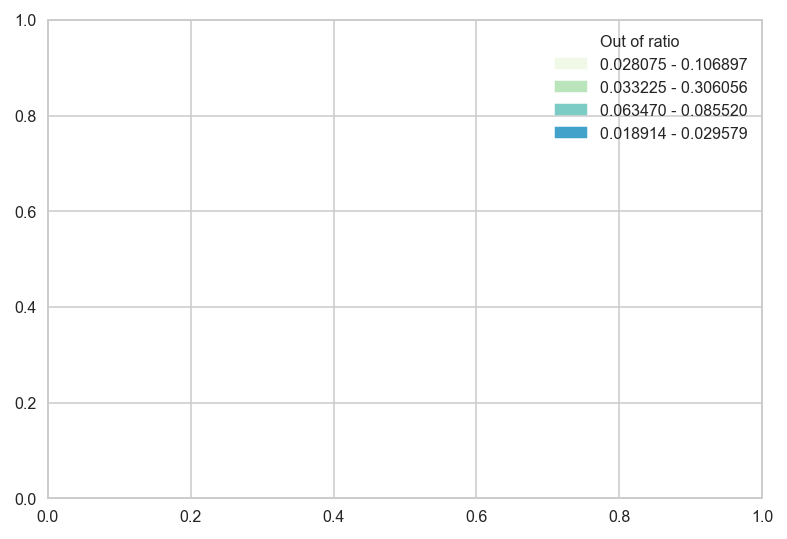

In [28]:
import matplotlib.patches as mpatches

colour_1 = mpatches.Patch(color = 'white', label = 'Out of ratio')
colour_2 = mpatches.Patch(color='#f0f9e8', label='0.028075 - 0.106897')
colour_3 = mpatches.Patch(color='#bae4bc', label='0.033225 - 0.306056')
colour_4 = mpatches.Patch(color='#7bccc4', label='0.063470 - 0.085520')
colour_5 = mpatches.Patch(color='#43a2ca', label='0.018914 - 0.029579')
colour_6 = mpatches.Patch(color='#0868ac', label='0.022333 - 0.021948 ')
plt.legend(handles=[colour_1,colour_2,colour_3,colour_4,colour_5])

plt.show()